# Import functions

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory data analysis

In [ ]:
#gender = pd.read_csv('/content/gender_submission.csv')
tr = pd.read_csv('/content/train.csv')
ts = pd.read_csv('/content/test.csv')

In [ ]:
data = tr

**1. Correlation between features**

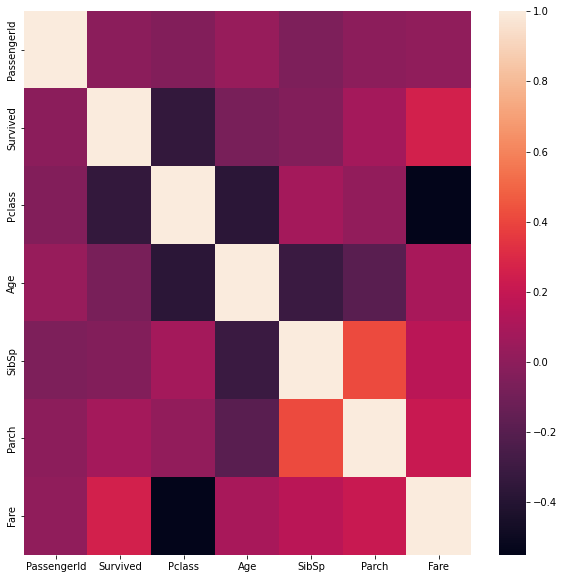

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())

**2. Each feature's surviving rate**

In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**3. Detecting outliers with box chart**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

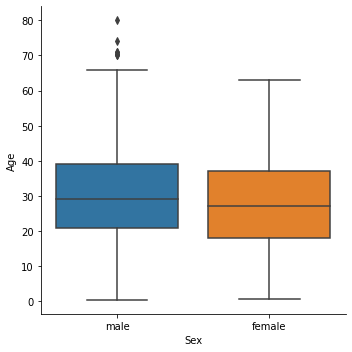

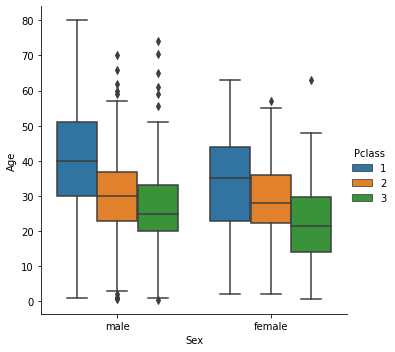

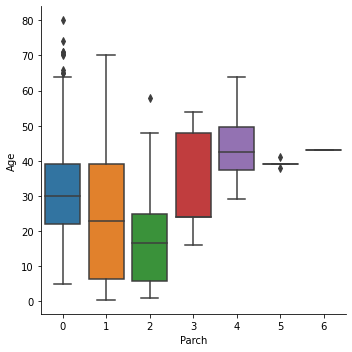

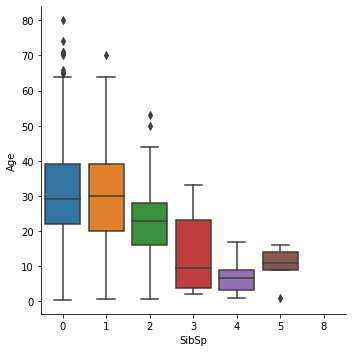

In [ ]:
g = sns.factorplot(y="Age",x="Sex",data=data,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=data,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=data,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=data,kind="box")

# Data cleaning

**1. Replace nan in age with sex-class age mean**

In [ ]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data[['Sex', 'Pclass','Age']].groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
data.loc[(data.Age.isnull()) & (data.Sex=='female') & (data.Pclass==1),'Age']=data[(data.Sex == 'female') & (data.Pclass == 1)]['Age'].mean()
data.loc[(data.Age.isnull()) & (data.Sex=='female') & (data.Pclass==2),'Age']=data[(data.Sex == 'female') & (data.Pclass == 2)]['Age'].mean()
data.loc[(data.Age.isnull()) & (data.Sex=='female') & (data.Pclass==3),'Age']=data[(data.Sex == 'female') & (data.Pclass == 3)]['Age'].mean()

data.loc[(data.Age.isnull()) & (data.Sex=='male') & (data.Pclass==1),'Age']=data[(data.Sex == 'male') & (data.Pclass == 1)]['Age'].mean()
data.loc[(data.Age.isnull()) & (data.Sex=='male') & (data.Pclass==2),'Age']=data[(data.Sex == 'male') & (data.Pclass == 2)]['Age'].mean()
data.loc[(data.Age.isnull()) & (data.Sex=='male') & (data.Pclass==3),'Age']=data[(data.Sex == 'male') & (data.Pclass == 2)]['Age'].mean()

In [ ]:
data_na = {'Name':['Age', 'Cabin', 'Embarked'],
        'na_count':[tr.Age.isna().sum(), tr.Cabin.isna().sum(), tr.Embarked.isna().sum()]}
na_df = pd.DataFrame(data_na)
na_df

,Name,na_count
0,Age,0
1,Cabin,687
2,Embarked,2


**2. NaNs in Cabin**

In [ ]:
data.Cabin = data.Cabin.fillna('N')

In [ ]:
data.Cabin = data.Cabin.str[:1]

In [ ]:
data.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

**3. NaNs in Embarked**

In [ ]:
data.Embarked.mode()
data.Embarked = data.Embarked.fillna('S')

**4. Data inbalance**

In [ ]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Transform Cabin column to Cabin Class number, NaNs are N class

# Feature engineering

In [ ]:
data.loc[data.Sex=='female', 'sex_adj'] = 0
data.loc[data.Sex=='male', 'sex_adj'] = 1

In [ ]:
emb = data.Embarked
emb = pd.get_dummies(emb)
cab = data.Cabin
cab = pd.get_dummies(cab)

In [ ]:
emb = emb.rename(columns={'C': 'eC', 'Q': 'eQ', 'S':'eS'})

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'sex_adj'],
      dtype='object')

In [ ]:
data = data[['PassengerId', 'Survived', 'Pclass','Age', 'SibSp','Parch','Fare','sex_adj']]

In [ ]:
data = pd.concat([data,emb], axis = 'columns')
data = pd.concat([data,cab], axis = 'columns')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_adj,eC,eQ,eS,A,B,C,D,E,F,G,N,T
0,1,0,3,22.0,1,0,7.2500,1.0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,0.0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0.0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1.0,0,0,1,0,0,0,0,0,0,0,1,0


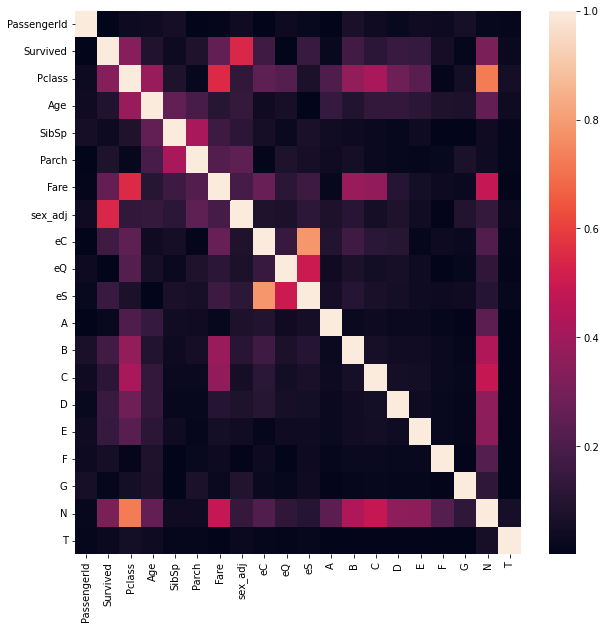

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(abs(data.corr()))

**adding two more features (age + economic status)**

In [ ]:
# data['rich'] = data['Pclass'].apply(lambda x: 'True' if x ==1 else 'False')

In [ ]:
# def flag(data):
#     if data['Age']<=40 and data['Pclass']==1:
#         return 'Rich Young'
#     elif data['Age']>40 and data['Pclass']==1:
#         return 'Rich Old'
#     else:
#         return 'Poor'

# data['Flag'] = data.apply(flag, axis = 1)
# data

# Apply logistic regression

In [ ]:
y = np.array(data['Survived'])
x = np.array(data.iloc[:,2:])

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(x, y, test_size= .33)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtr1 = scaler.fit_transform(Xtr)
Xts1 = scaler.transform(Xts)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',C= 100) #lasso penalize over fitting 
logreg.fit(Xtr1,ytr)

LogisticRegression(C=100)

In [ ]:
yhat = logreg.predict(Xts1)
a =np.mean(yhat ==yts)
print('accuracy of the classifer on test data is ' + str(round(a*100,2)) + '%')

accuracy of the classifer on test data is 81.02%


In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
confusion_matrix(yts, yhat)

array([[152,  27],
       [ 29,  87]])

# Optimizing logistic regression

**synthetic points are added to minority class**

In [ ]:
class_count_0, class_count_1 = data['Survived'].value_counts()

class_0 = data[data['Survived'] == 0]
class_1 = data[data['Survived'] == 1]# print the shape of the class
print('Dead:', class_0.shape)
print('Survived:', class_1.shape)

Dead: (549, 20)
Survived: (342, 20)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
import collections, numpy
collections.Counter(y_smote)

Counter({0: 549, 1: 549})

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(x_smote, y_smote, test_size= .33)

In [ ]:
scaler = StandardScaler()
Xtr1 = scaler.fit_transform(Xtr)
Xts1 = scaler.transform(Xts)

In [ ]:
logreg = LogisticRegression(penalty='l2',C= 100) #lasso penalize over fitting 
logreg.fit(Xtr1,ytr)

LogisticRegression(C=100)

In [ ]:
yhat = logreg.predict(Xts1)
a =np.mean(yhat ==yts)
print('accuracy of the classifer on test data is ' + str(round(a*100,2)) + '%')

accuracy of the classifer on test data is 80.44%


In [ ]:
confusion_matrix(yts, yhat)

array([[153,  32],
       [ 39, 139]])

miss hint young lady, master kid, fare can represent Cabin, these can be substuited(feature selection) 

tell a stoty, survival rate for all catgorical 

feature engineer, gae(old, young), fare(poor, rich), rich-female-family,etc